In [2]:
%load_ext rpy2.ipython

##LoF

In [3]:
%%R
library("data.table")
d.cc.lof <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.cc.lof.NOcombinedDataset.txt")


cLLK <- dim(d.cc.lof)[2]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

data.table 1.9.4  For help type: ?data.table
*** NB: by=.EACHI is now explicit. See README to restore previous behaviour.
[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


In [4]:
%%R
print(dim(d.cc.lof))
head(d.cc.lof)

[1] 287820      8
      V1  V2  V3  V4    V5  V6   V7       V8
1: 0.034 1.5 2.2 0.5 10000 0.5 5000 67103.54
2: 0.034 1.5 2.2 0.6 10000 0.5 5000 67068.34
3: 0.034 1.5 2.2 0.7 10000 0.5 5000 67034.12
4: 0.034 1.5 2.2 0.8 10000 0.5 5000 67000.04
5: 0.034 1.5 2.2 0.9 10000 0.5 5000 66965.76
6: 0.034 1.5 2.2 1.0 10000 0.5 5000 66931.11


In [5]:
%%R
library("ggplot2")

#d.cc.lof[plot(V1, -V8, xlab = 'pi')]

#p1 <- ggplot(d.cc.lof,aes(x= V1, y = -V8, group = V2)) + geom_point()
#print(p1)

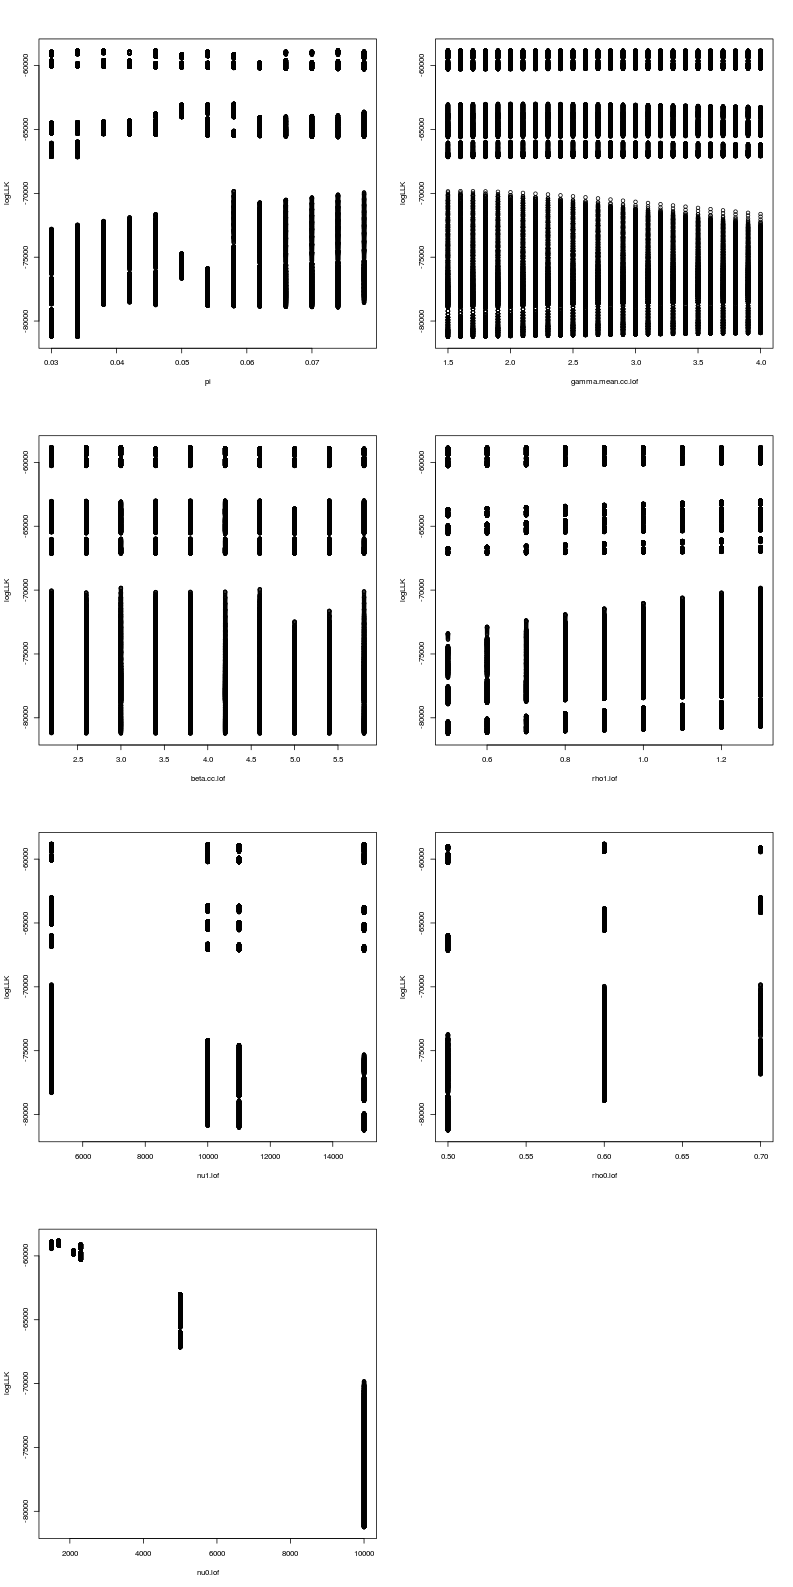

In [6]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    
    plot(d.cc.lof[[ii]], -d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

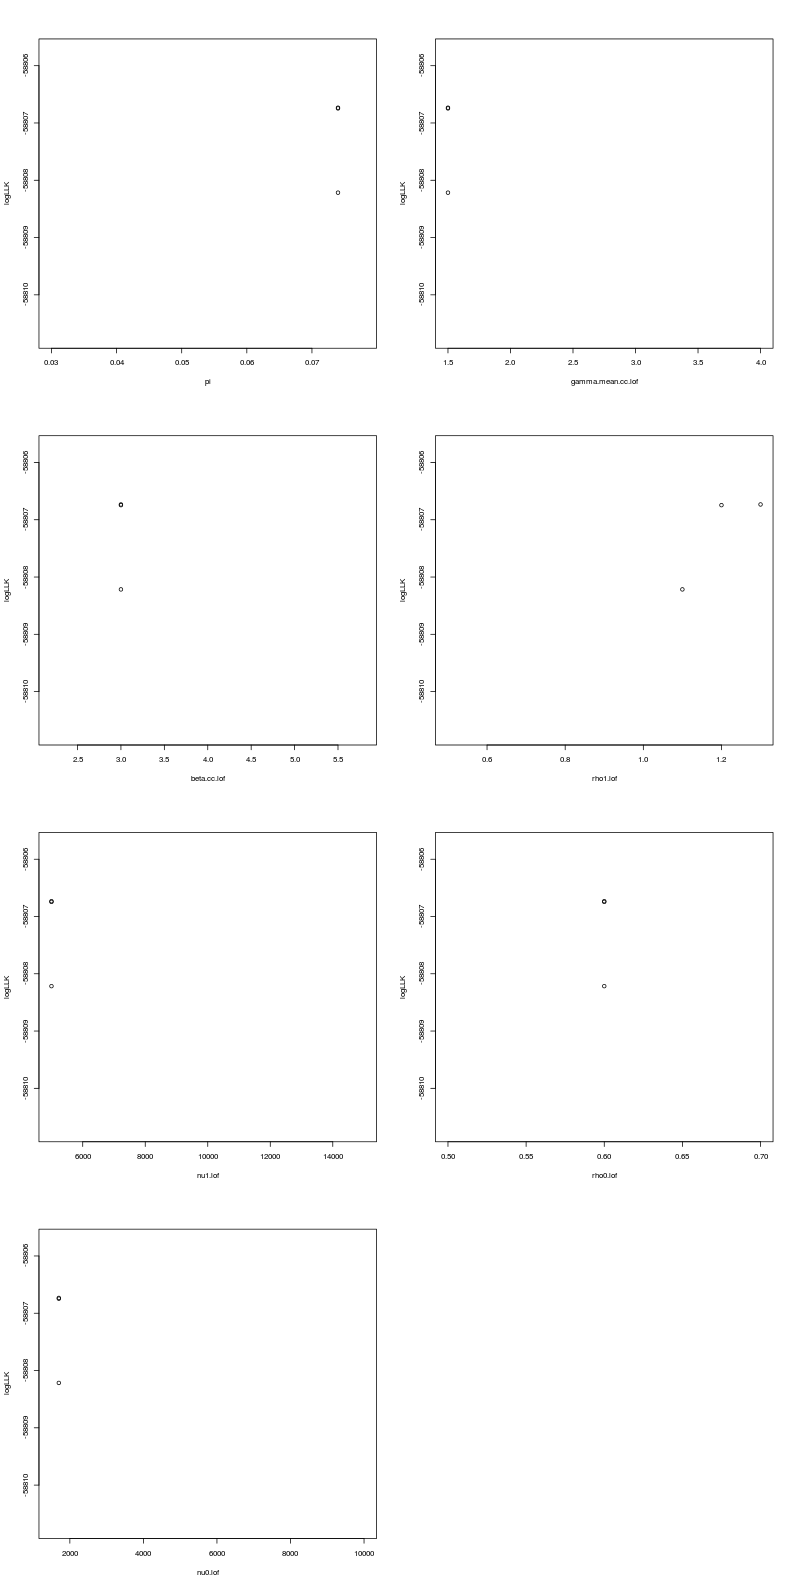

In [7]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.lof[[cLLK]]) + 1
lLimit <- uLimit - 5
d.cc.lof.1 <- d.cc.lof[V6>=lLimit]
par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof[[ii]], -d.cc.lof[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [8]:
%%R
d.cc.lof.1[order(V8)]

           V1  V2  V3  V4    V5  V6    V7       V8
     1: 0.074 1.5 3.0 1.3  5000 0.6  1700 58806.73
     2: 0.074 1.5 3.0 1.2  5000 0.6  1700 58806.74
     3: 0.074 1.5 3.0 1.1  5000 0.6  1700 58808.22
     4: 0.074 1.6 3.0 1.2  5000 0.6  1700 58811.13
     5: 0.074 1.5 3.0 1.0  5000 0.6  1700 58811.37
    ---                                           
287816: 0.034 1.5 4.2 0.5 15000 0.5 10000 81228.64
287817: 0.034 1.5 4.6 0.5 15000 0.5 10000 81229.69
287818: 0.034 1.5 5.0 0.5 15000 0.5 10000 81230.67
287819: 0.034 1.5 5.4 0.5 15000 0.5 10000 81231.29
287820: 0.034 1.5 5.8 0.5 15000 0.5 10000 81231.91


###Set limit for the proportion of protective variants and the frequency of variants

In [23]:
%%R
d.cc.lof.1 <- d.cc.lof[pgamma(1, V2*V3, rate = V3) < 0.017]

d.cc.lof.1 <- d.cc.lof.1[V4/V5 <= V6/V7]
d.cc.lof.1 


           V1  V2  V3  V4    V5  V6   V7       V8
     1: 0.034 2.9 2.2 0.5 10000 0.5 5000 67040.90
     2: 0.034 2.9 2.2 0.6 10000 0.5 5000 66994.19
     3: 0.034 2.9 2.2 0.7 10000 0.5 5000 66948.95
     4: 0.034 2.9 2.2 0.8 10000 0.5 5000 66904.42
     5: 0.034 2.9 2.2 0.9 10000 0.5 5000 66860.32
    ---                                          
140211: 0.070 3.8 5.0 0.6  5000 0.6 5000 64855.35
140212: 0.070 3.9 5.0 0.5  5000 0.6 5000 64971.36
140213: 0.070 3.9 5.0 0.6  5000 0.6 5000 64861.18
140214: 0.070 4.0 5.0 0.5  5000 0.6 5000 64975.07
140215: 0.070 4.0 5.0 0.6  5000 0.6 5000 64867.39


In [24]:
%%R
d.cc.lof.1 <- d.cc.lof.1[(1 - pgamma(0.001, V4, rate = V5)) <= 10^-6]
d.cc.lof.1 

         V1  V2  V3  V4    V5  V6    V7       V8
    1: 0.03 2.9 2.2 0.5 15000 0.5 10000 81044.25
    2: 0.03 2.9 2.2 0.6 15000 0.5 10000 80954.26
    3: 0.03 2.9 2.2 0.7 15000 0.5 10000 80861.38
    4: 0.03 3.0 2.2 0.5 15000 0.5 10000 81032.98
    5: 0.03 3.0 2.2 0.6 15000 0.5 10000 80941.14
   ---                                          
40300: 0.07 4.0 5.0 0.9 15000 0.6  5000 65282.91
40301: 0.07 4.0 5.0 1.0 15000 0.6  5000 65240.58
40302: 0.07 4.0 5.0 1.1 15000 0.6  5000 65199.59
40303: 0.07 4.0 5.0 1.2 15000 0.6  5000 65159.86
40304: 0.07 4.0 5.0 1.3 15000 0.6  5000 65121.31


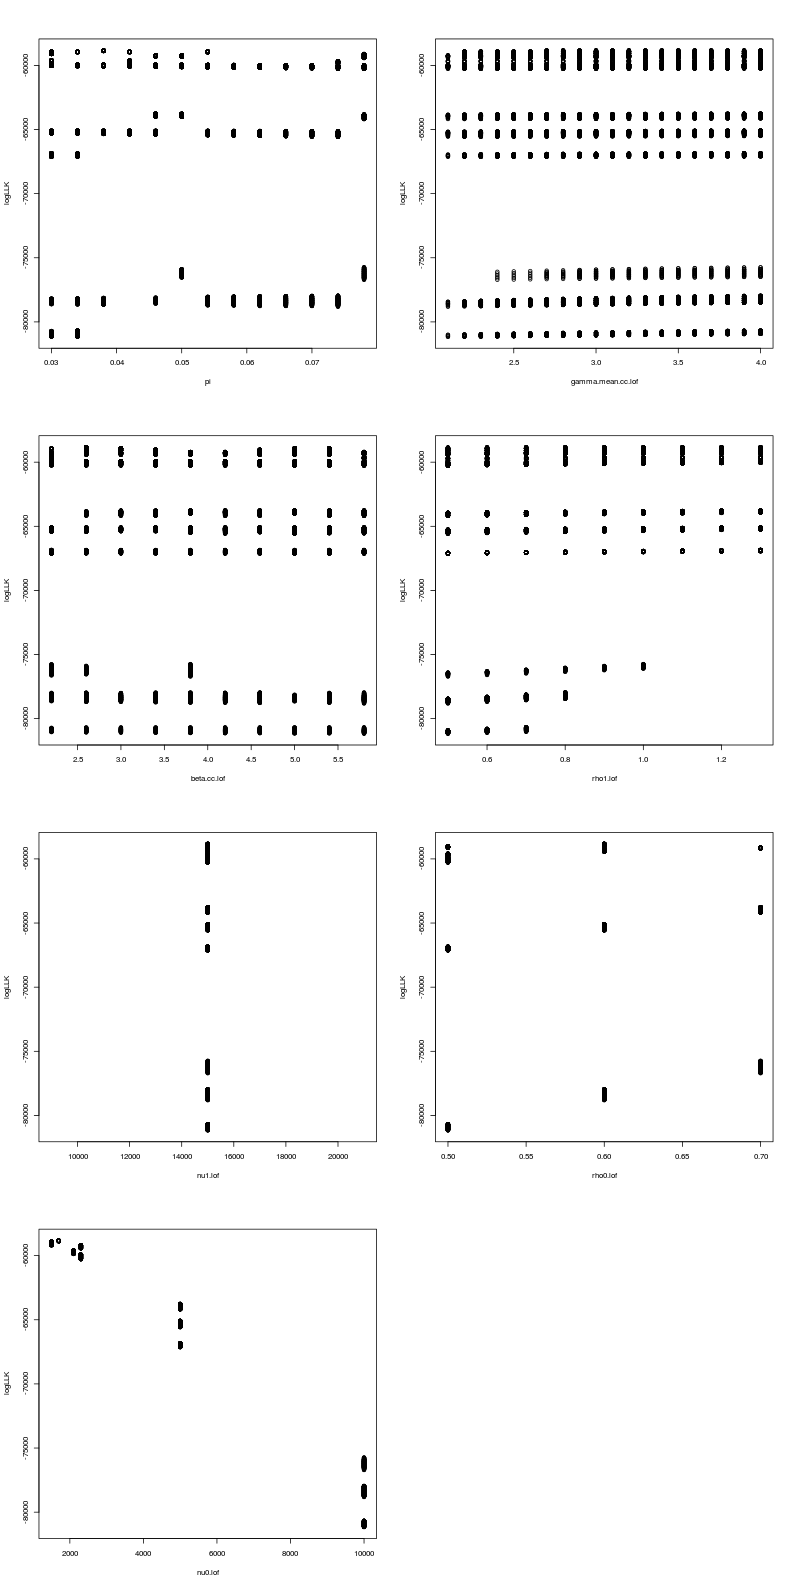

In [25]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], -d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

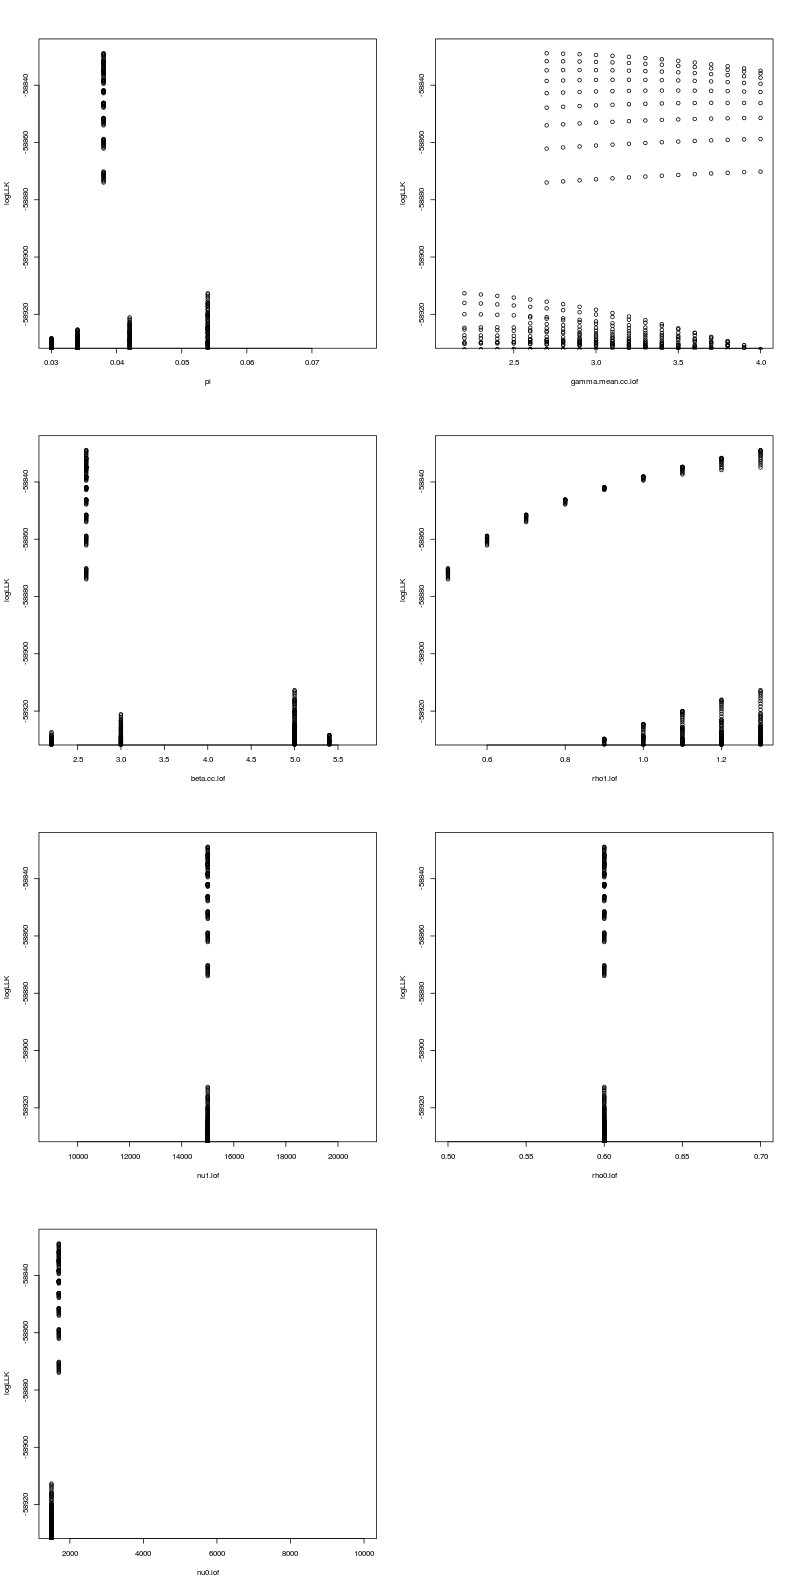

In [28]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.lof.1[[cLLK]]) + 1
lLimit <- uLimit - 100
d.cc.lof.1 <- d.cc.lof.1[V8>=lLimit]
par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.lof.1[[ii]], -d.cc.lof.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [27]:
%%R
head(d.cc.lof.1[order(V8)], 40)


       V1  V2  V3  V4    V5  V6   V7       V8
 1: 0.038 2.7 2.6 1.3 15000 0.6 1700 58828.84
 2: 0.038 2.8 2.6 1.3 15000 0.6 1700 58828.98
 3: 0.038 2.9 2.6 1.3 15000 0.6 1700 58829.17
 4: 0.038 3.0 2.6 1.3 15000 0.6 1700 58829.42
 5: 0.038 3.1 2.6 1.3 15000 0.6 1700 58829.72
 6: 0.038 3.2 2.6 1.3 15000 0.6 1700 58830.08
 7: 0.038 3.3 2.6 1.3 15000 0.6 1700 58830.49
 8: 0.038 3.4 2.6 1.3 15000 0.6 1700 58830.96
 9: 0.038 3.5 2.6 1.3 15000 0.6 1700 58831.48
10: 0.038 2.7 2.6 1.2 15000 0.6 1700 58831.61
11: 0.038 2.8 2.6 1.2 15000 0.6 1700 58831.64
12: 0.038 2.9 2.6 1.2 15000 0.6 1700 58831.72
13: 0.038 3.0 2.6 1.2 15000 0.6 1700 58831.84
14: 0.038 3.1 2.6 1.2 15000 0.6 1700 58832.02
15: 0.038 3.6 2.6 1.3 15000 0.6 1700 58832.06
16: 0.038 3.2 2.6 1.2 15000 0.6 1700 58832.25
17: 0.038 3.3 2.6 1.2 15000 0.6 1700 58832.52
18: 0.038 3.7 2.6 1.3 15000 0.6 1700 58832.69
19: 0.038 3.4 2.6 1.2 15000 0.6 1700 58832.85
20: 0.038 3.5 2.6 1.2 15000 0.6 1700 58833.23
21: 0.038 3.8 2.6 1.3 15000 0.6 17

In [19]:
#!gist -p Test_grid_cc_using_rho1_and_rho1_fromTADApaper.ipynb

In [22]:
!gist -u https://gist.github.com/0fc2b461871c08094de6 Test_grid_cc_using_rho1_and_rho1_fromTADApaper.ipynb

https://gist.github.com/0fc2b461871c08094de6


##MIS3

In [26]:
%%R
library("data.table")
d.cc.mis3 <- fread("/usr/data/Documents/SaveDataFromServer/CombinedDataThreeDiseases/results.cc.mis3.combinedDataset.txt")


cLLK1 <- dim(d.cc.mis3)[2]
d.cc.mis3 <- d.cc.mis3[V8 != "NA"]
#full.cc.LoF.rho[, cLLK] <- -full.cc.LoF.rho[, cLLK]
getwd()

[1] "/usr/data/Documents/GitHub/TestR/HBproject/extTADA"


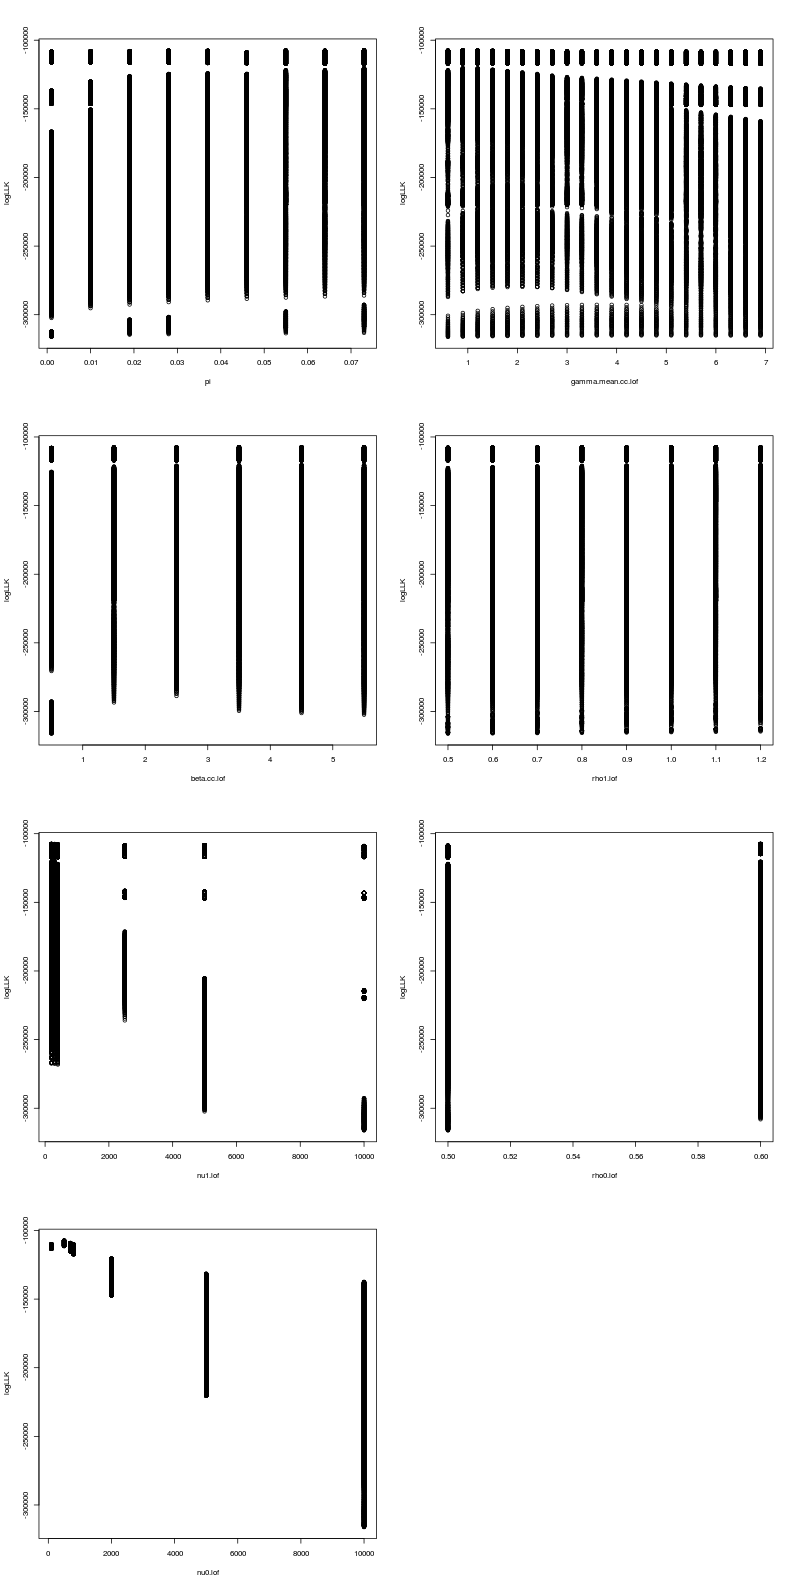

In [27]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK1 -1)){
    
    plot(d.cc.mis3[[ii]], -d.cc.mis3[[cLLK1]], xlab = nameCol[ii], ylab = 'logLLK')
}

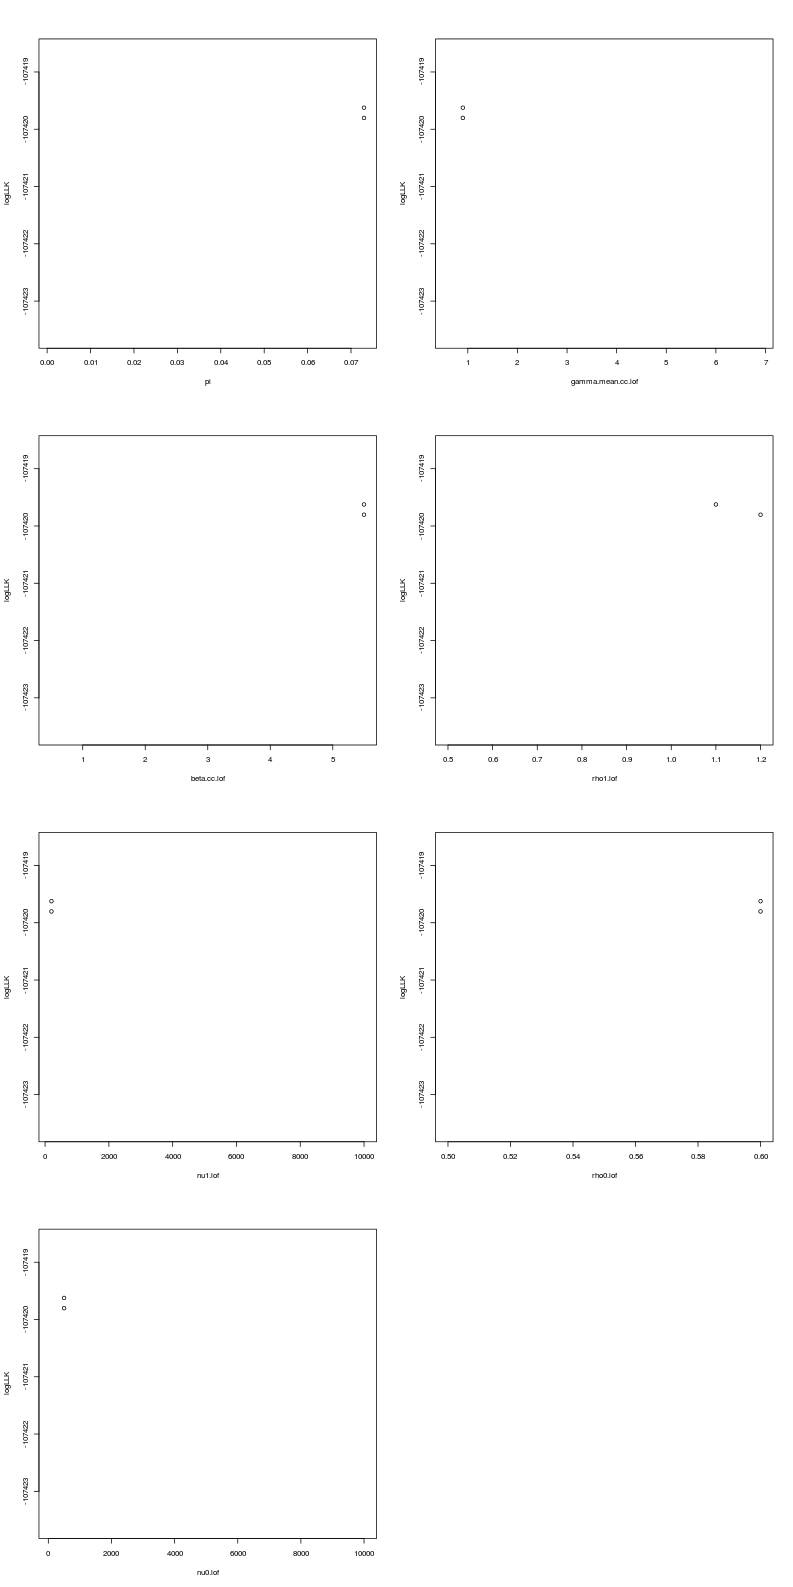

In [28]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.mis3[[cLLK1]]) + 1
lLimit <- uLimit - 5

par(mfrow = c(4, 2))
for (ii in 1:(cLLK1 -1)){
    plot(d.cc.mis3[[ii]], -d.cc.mis3[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [29]:
%%R
d.cc.mis3.1 <- d.cc.mis3[pgamma(1, V2*V3, rate = V3) < 0.02]

d.cc.mis3.1 <- d.cc.mis3.1[V4/V5 <= V6/V7]

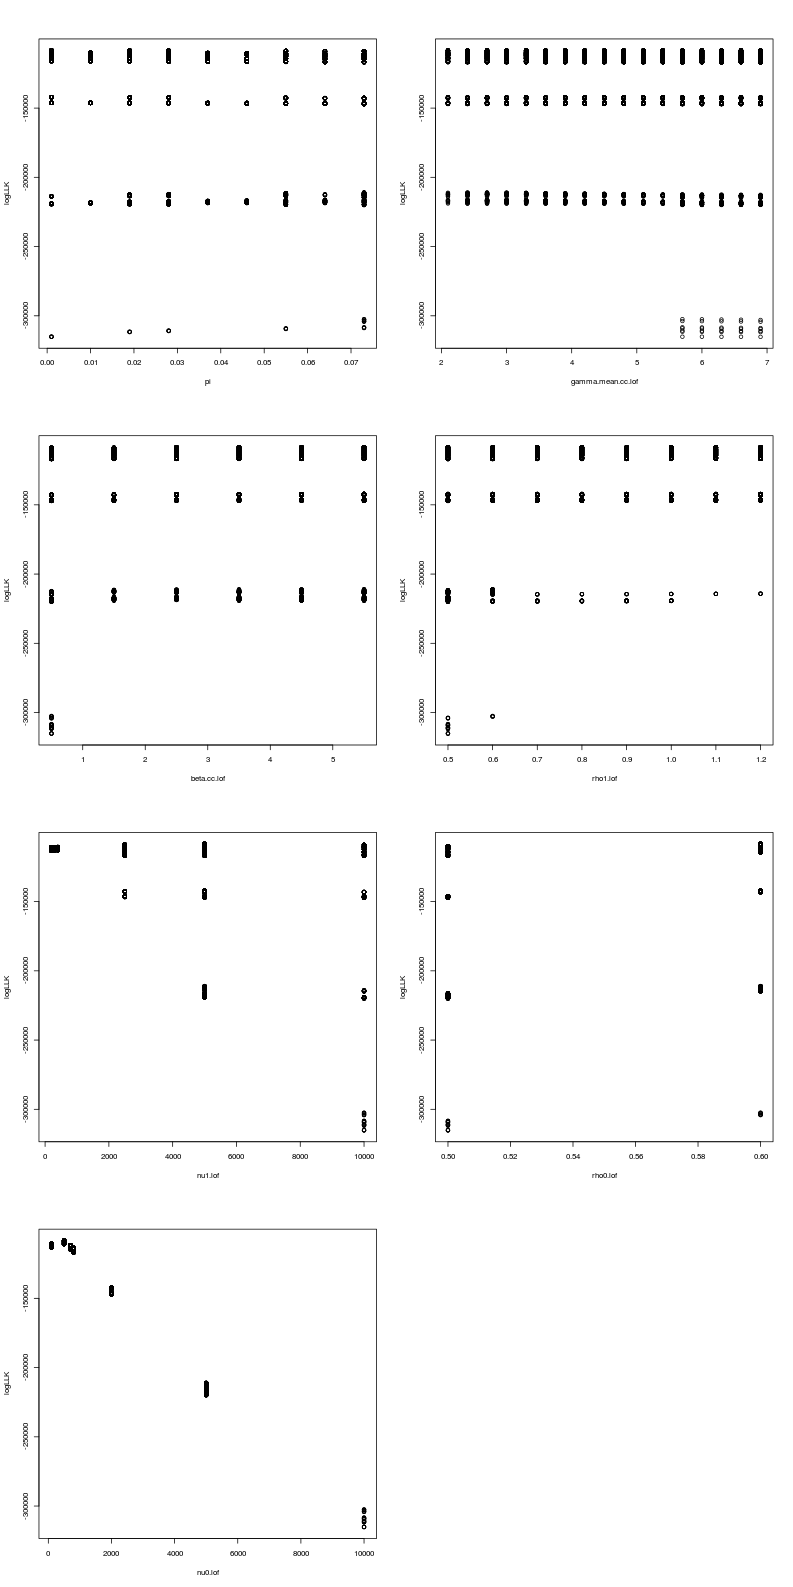

In [30]:
%%R -w 28 -h 56 -u cm
nameCol <- c("pi", "gamma.mean.cc.lof", "beta.cc.lof", "rho1.lof",
            "nu1.lof", "rho0.lof", "nu0.lof")

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], -d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK')
}

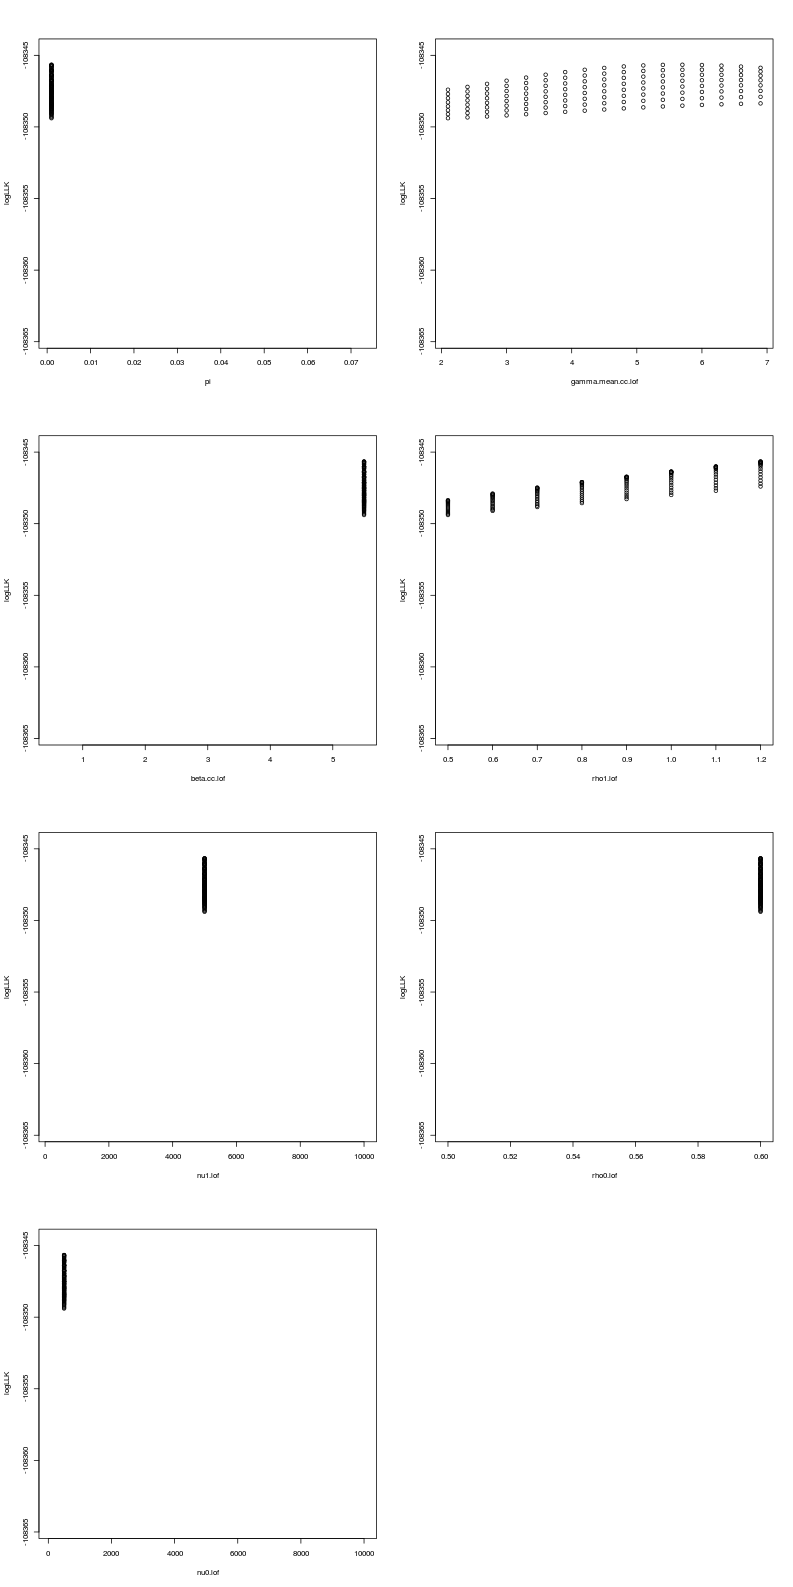

In [31]:
%%R -w 28 -h 56 -u cm
uLimit <- max(-d.cc.mis3.1[[cLLK]]) + 1
lLimit <- uLimit - 20

par(mfrow = c(4, 2))
for (ii in 1:(cLLK -1)){
    plot(d.cc.mis3.1[[ii]], -d.cc.mis3.1[[cLLK]], xlab = nameCol[ii], ylab = 'logLLK', ylim = c(lLimit, uLimit))
}

In [32]:
%%R
d.cc.mis3.1[V8>=lLimit]

          V1  V2  V3  V4    V5  V6   V7       V8
    1: 0.001 5.7 0.5 0.5 10000 0.5  100 110696.0
    2: 0.001 5.7 0.5 0.6 10000 0.5  100 110695.5
    3: 0.001 5.7 0.5 0.7 10000 0.5  100 110695.0
    4: 0.001 5.7 0.5 0.8 10000 0.5  100 110694.6
    5: 0.001 5.7 0.5 0.9 10000 0.5  100 110694.1
   ---                                          
63428: 0.073 6.9 5.5 0.8  5000 0.6 2000 142983.4
63429: 0.073 6.9 5.5 0.9  5000 0.6 2000 142961.3
63430: 0.073 6.9 5.5 1.0  5000 0.6 2000 142941.5
63431: 0.073 6.9 5.5 1.1  5000 0.6 2000 142923.6
63432: 0.073 6.9 5.5 1.2  5000 0.6 2000 142907.7
